# Introduction
Currently customers are visiting your hotel and started dropping their reviews about your hotel and you have collected all the reviews up to data and you are clueless if those reviews represent positive or negative emotions (test).

NLTK: the most famous python module for NLP techniques
Gensim: a topic-modelling and vector space modelling toolkit
Scikit-learn: the most used python machine learning library

You would need to build a system to predict if the reviews are positive/negative, so that you can address any issues which are in the form of negative feedback.

In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, roc_auc_score
#from sklearn.utils import s1804

# Load data
We first start by loading the raw data. Each textual reviews is splitted into a positive part and a negative part. We group them together in order to start with only raw text data and no other information.

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df2 = pd.read_csv('test.csv')

In [4]:
df.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [5]:
df.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [6]:
df1=df
df.shape

(38932, 5)

In [7]:
df.describe()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
count,38932,38932,38932,38932,38932
unique,38932,38932,11,3,2
top,id27227,I spent one night in Indianapolis for a concer...,Firefox,Desktop,happy
freq,1,1,7367,15026,26521


In [42]:
df.dtypes

User_ID         object
Description     object
Browser_Used    object
Device_Used     object
Is_Response     object
neg             object
lower_case      object
dtype: object

# Feature engineering
lower the text

tokenize the text (split the text into words) and remove the punctuation

remove useless words that contain numbers

remove useless stop words like 'the', 'a' ,'this' etc.

Part-Of-Speech (POS) tagging: assign a tag to every word to define if it 
corresponds to a noun, a verb etc. using the WordNet lexical database


In [8]:
all_reviews = df['Description']
all_sent_values = []
all_sentiments = []

In [9]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyser = SentimentIntensityAnalyzer()


In [37]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import warnings
import string
warnings.filterwarnings('ignore')

In [39]:
lowercase=[]
cleaned_text=[]
for i in range(0,38932):
    lower_case = lowercase.append(all_reviews[i].lower())
    cleaned_text = lower_case[i].translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

#okenized_words = word_tokenize(cleaned_text, "english")
#text = open('read.txt', 'r',encoding='utf-8')

text = open('read.txt', encoding="utf-8").read()

lower_case = text.lower()

# str.maketrans removes any punctuations 

cleaned_text = lower_case.translate(str.maketrans('', '', string.punctuation))

# Using word_tokenize to tokenize sentence into words

tokenized_words = word_tokenize(cleaned_text, "english")


TypeError: 'NoneType' object is not subscriptable

In [57]:
df1['lower_case']=df1['Description'].apply(lambda x: ( x.lower()))
df1['lower_case']=(df1['lower_case'])

In [62]:
df1['cleanedtest'] = df1['lower_case'].str.replace(r'[^\w\d\s]', '')


# Replace whitespace between terms with a single space
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'\s+', ' ')

# Remove leading and trailing whitespace
df1['cleanedtest'] = df1['cleanedtest'].str.replace(r'^\s+|\s+?$!@#$%^&*_-+=:;"''"', '')

In [64]:
stop_words = set(stopwords.words('english') )

df1['cleanedtest'] = df1['cleanedtest'].apply(lambda x: ' '.join(term for term in x.split() if term not in stop_words))

In [69]:
k=df1['cleanedtest']
df1['tokenized_sents'] = k.apply(lambda x: nltk.word_tokenize(x['sentences']), axis=1)

AttributeError: 'Series' object has no attribute 'word_tokenize'

In [9]:
df1['neg']=df['Description'].apply(lambda x: analyser.polarity_scores(x)['neg'])

In [10]:
df1['neu']=df['Description'].apply(lambda x: analyser.polarity_scores(x)['neu'])
df1['pos']=df['Description'].apply(lambda x: analyser.polarity_scores(x)['pos'])
df1['compound']=df['Description'].apply(lambda x: analyser.polarity_scores(x)['compound'])

In [65]:
df1.head(4)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,neg,lower_case,df1,cleanedtest
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...,the room was kind of clean but had a very stro...,room kind clean strong smell dogs generally av...
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,i stayed at the crown plaza april -- - april -...,i stayed at the crown plaza april -- - april -...,i stayed at the crown plaza april april th...,stayed crown plaza april april staff friendly ...
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...,i booked this hotel through hotwire at the low...,booked hotel hotwire lowest price could find g...
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...,stayed here with husband and sons on the way t...,stayed husband sons way alaska cruise loved ho...


In [67]:
#sample data
sample = df['Description'][5]
print(sample)
print('Sentiment: ')
print(analyser.polarity_scores(sample)['compound'])

We had - rooms. One was very nice and clearly had been updated more recently than the other. The other was clean and the bed was comfy but it needed some updating (carpet was old and wrinkled for example). Great location for visiting Inner Harbor, getting to Fells Point, Orioles games etc. SuperShuttle from BWI worked great both ways. TV remotes in both rooms were terrible but we didn't watch much TV so not a big deal. Wireless was sketchy on --th and --th floors but again, didn't need it much - we were on vacation so it didn't really matter. Breakfast was good each morning. Would stay again if in town.
Sentiment: 
0.9472


In [12]:
df1.head(4)

,User_ID,Description,Browser_Used,Device_Used,Is_Response,neg,neu,pos,compound
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0.000,0.675,0.325,0.9628
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0.053,0.897,0.050,-0.1243
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0.048,0.866,0.085,0.9279
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.000,0.653,0.347,0.9920


In [13]:
compund=df1['compound']
SENTIMENT_VALUE = []
SENTIMENT = []
for i in compund:
    if (i<=1 and i>=0):
        SENTIMENT.append('happy')
        SENTIMENT_VALUE.append(2)
    else:
        SENTIMENT.append('not happy')
        SENTIMENT_VALUE.append(1)
#df['Is_Response']

In [14]:
SENTIMENT[0:5]

['happy', 'not happy', 'happy', 'happy', 'happy']

In [15]:
df1=df
df1['SENTIMENT_VALUE']=SENTIMENT_VALUE
df1['SENTIMENT']=SENTIMENT

In [16]:
df1.head(4 )

,User_ID,Description,Browser_Used,Device_Used,Is_Response,neg,neu,pos,compound,SENTIMENT_VALUE,SENTIMENT
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy,0.000,0.675,0.325,0.9628,2,happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy,0.053,0.897,0.050,-0.1243,1,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy,0.048,0.866,0.085,0.9279,2,happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy,0.000,0.653,0.347,0.9920,2,happy


# Exploratory data analysis
In order to have a better understanding of our data, let's explore it a little:

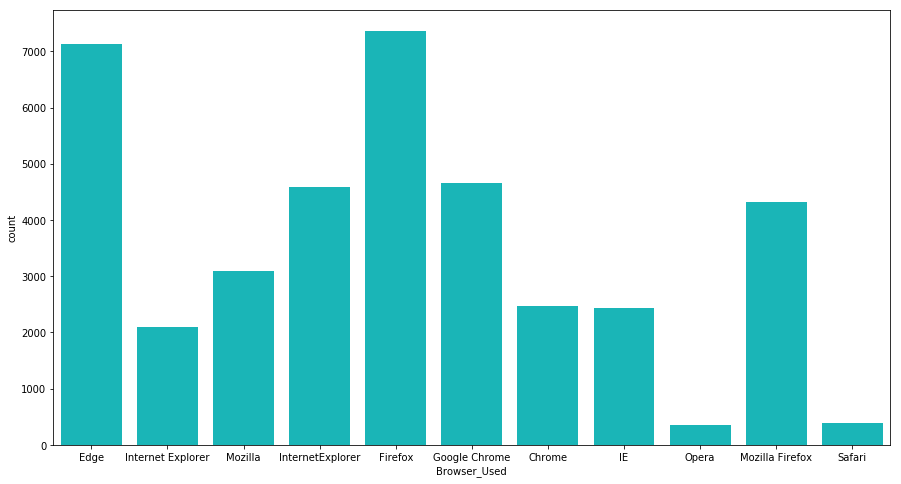

In [17]:
plt.figure(figsize=(15,8))
sns.countplot('Browser_Used', data=df, color="darkturquoise")
plt.show()

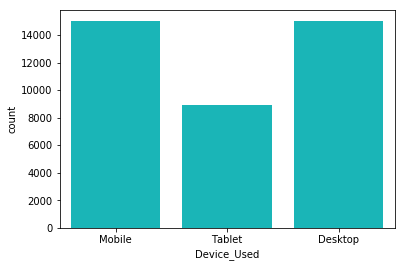

In [18]:
sns.countplot('Device_Used', data=df, color="darkturquoise")
plt.show()

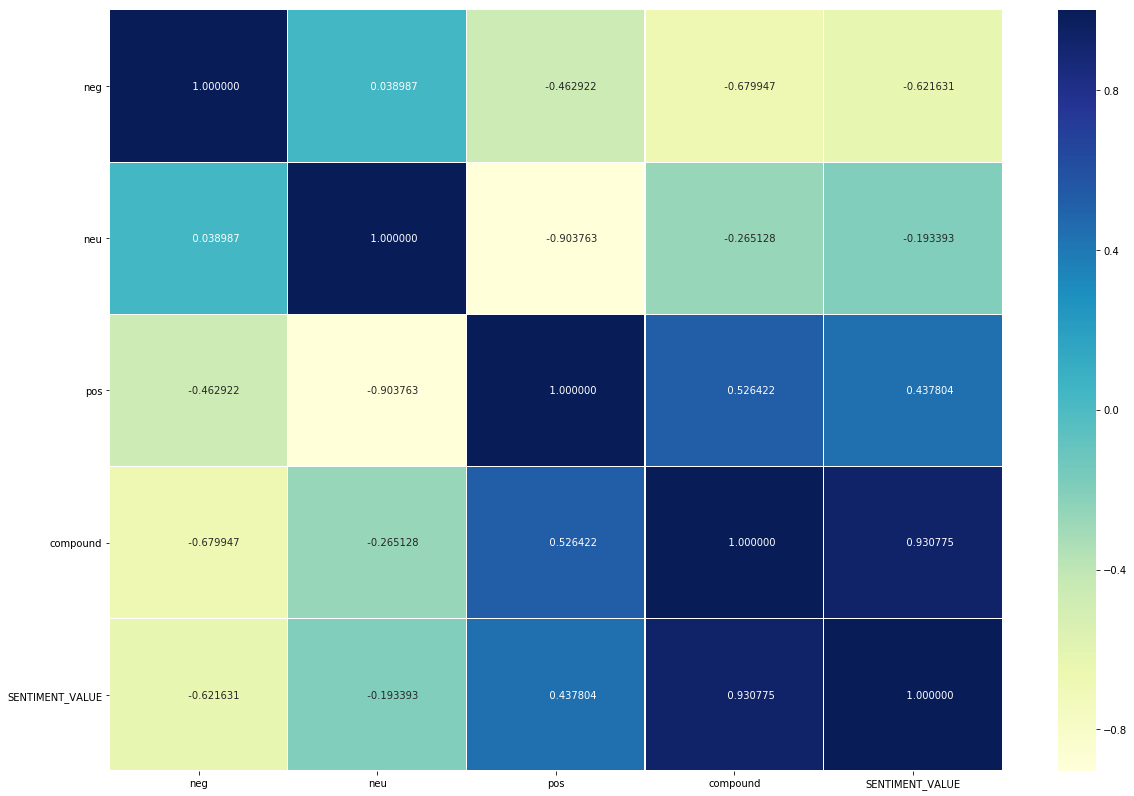

In [19]:
plt.figure(figsize=(20,14))
sns.heatmap(df.corr(),linewidths=.1,fmt="19f",cmap="YlGnBu", annot=True)
plt.yticks(rotation=0);

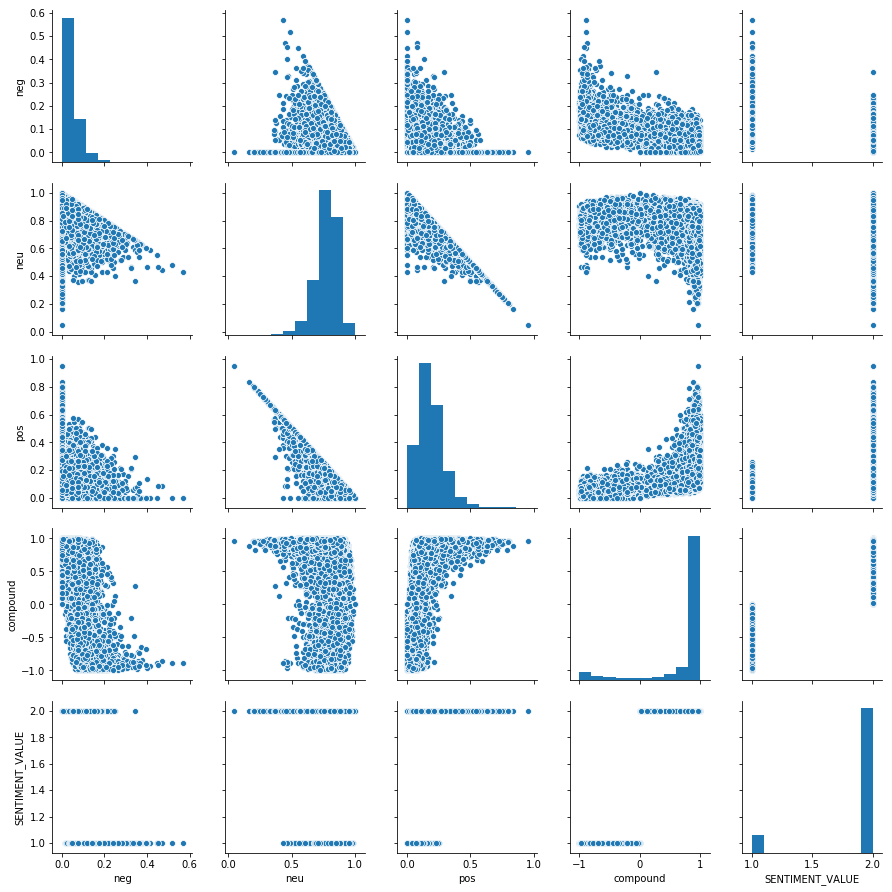

In [20]:
sns.pairplot(df)

happy and not happy counts 
 happy        34743
not happy     4189
Name: SENTIMENT, dtype: int64


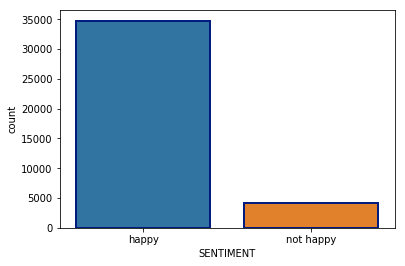

In [21]:
sns.countplot(x='SENTIMENT',data=df1,linewidth=2,edgecolor=sns.color_palette("dark", 1))
print ('happy and not happy counts','\n',df.SENTIMENT.value_counts())

happy and not happy counts 
 happy        26521
not happy    12411
Name: Is_Response, dtype: int64


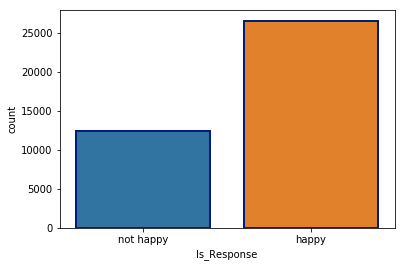

In [22]:
print ('happy and not happy counts','\n',df.Is_Response.value_counts())
sns.countplot(x='Is_Response',data=df1,linewidth=2,edgecolor=sns.color_palette("dark", 1))


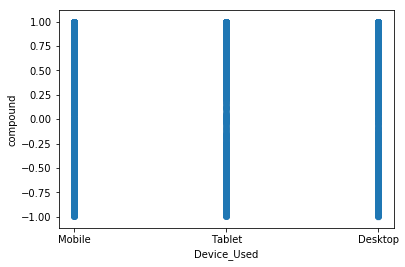

In [23]:
ylabel2 = df1["compound"]
plt.ylabel("compound")
xlabel2 = df1["Device_Used"]
plt.xlabel("Device_Used")
plt.scatter(xlabel2, ylabel2, alpha=0.1)
plt.show()

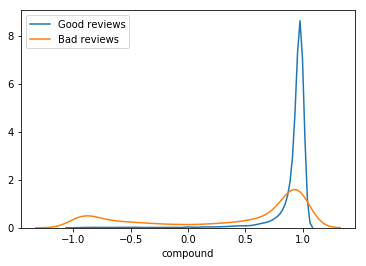

In [32]:
for x in ['happy',  'not happy']:
    subset = df1[df1['Is_Response'] == x]
    
    # Draw the density plot
    if x == 'happy':
        label = "Good reviews"
    else:
        label = "Bad reviews"
    sns.distplot(subset['compound'], hist = False, label = label)

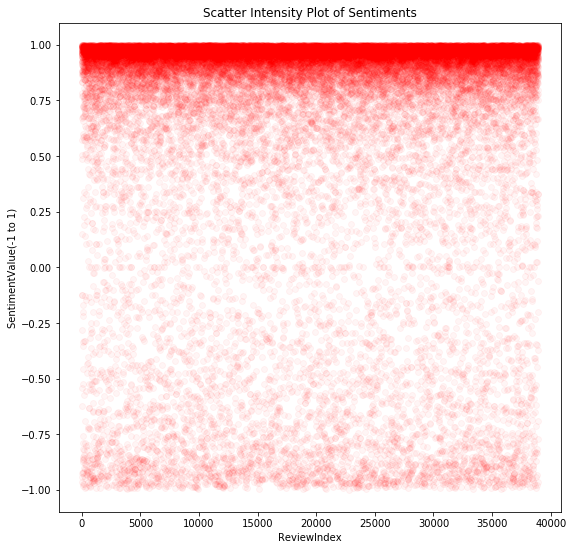

In [51]:
xaxis = []
for i in range(0,38932):
    xaxis.append(i)
    all_sent_values.append(df1['compound'][i])
ylabel_new_1 = all_sent_values[:38932]

xlabel = xaxis
plt.figure(figsize=(9,9))
plt.xlabel('ReviewIndex')
plt.ylabel('SentimentValue(-1 to 1)')
plt.plot(xlabel, ylabel_new_1, 'ro',  alpha=0.04)

plt.title('Scatter Intensity Plot of Sentiments')
plt.show()

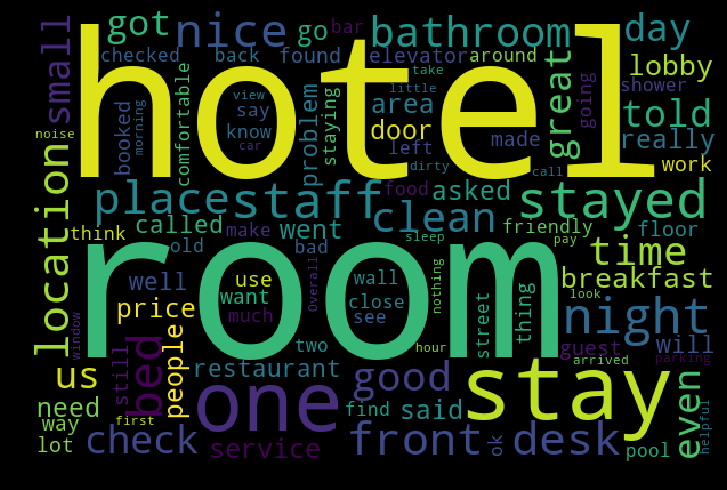

In [35]:
from wordcloud import WordCloud
from nltk.corpus import  stopwords
zz = df['Description'][df['Is_Response']=='not happy']
zza = WordCloud(width=600,height=400,background_color='black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('on')
plt.tight_layout(pad=0)
plt.show()

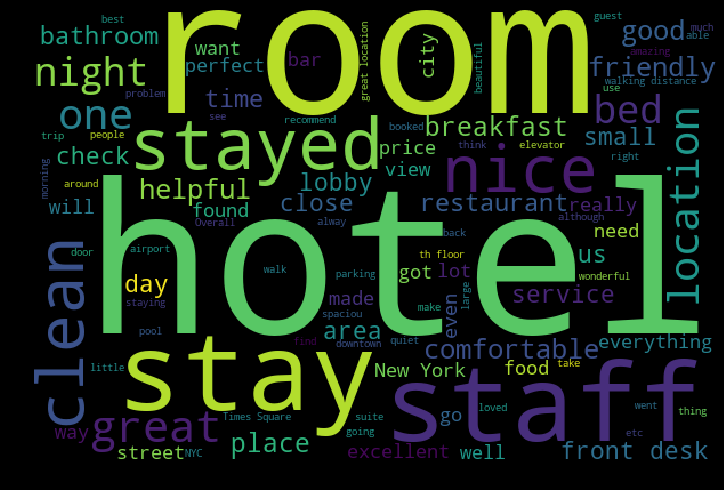

In [56]:
from wordcloud import WordCloud
from nltk.corpus import  stopwords
zz = df['Description'][df['Is_Response']=='happy']
zza = WordCloud(width=600,height=400,background_color='Black',max_words=100).generate(' '.join(zz))
plt.figure(figsize=(10,10),facecolor='k')
plt.imshow(zza)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# Modelling reviewer_score

In [63]:
df1=df1.drop(['User_ID','Browser_Used','Is_Response','Device_Used','SENTIMENT_VALUE', 'SENTIMENT'],axis=1)

In [64]:
df1.head(4)

,Description,neg,neu,pos,compound
0,The room was kind of clean but had a VERY stro...,0.000,0.675,0.325,0.9628
1,I stayed at the Crown Plaza April -- - April -...,0.053,0.897,0.050,-0.1243
2,I booked this hotel through Hotwire at the low...,0.048,0.866,0.085,0.9279
3,Stayed here with husband and sons on the way t...,0.000,0.653,0.347,0.9920


#### using countvectorizer

In [70]:
vect1 = CountVectorizer(ngram_range=(1,1))


X = df1.loc[:,('cleanedtest')]

features = vect1.fit_transform(X)

X = features
y = df['Is_Response']
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)


In [ ]:
#model formation
naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 2)
model = LogisticRegression()
z=[svm,dtc,knn,model,rf,naive]
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print ('Final score {} = >' .format( i ) , accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))

    conf_mat = confusion_matrix(y_test,y_pred)

    ax=plt.subplot()

    sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)

    ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

    ax.set_title('Confusion matrix')
    ax.xaxis.set_ticklabels(['happy','nothappy'])
    ax.yaxis.set_ticklabels(['happy','nothappy'])
    plt.show()

#### using Tfidvector

In [70]:
tf_vec = TfidfVectorizer()
#vect1 = CountVectorizer(ngram_range=(1,1))


X = df1.loc[:,('Description')]

features = tf_vec.fit_transform(X)

X = features
y = df['Is_Response']
X_train,x_test,Y_train,y_test = train_test_split(X,y,random_state=42)


final score SVC(random_state=1) = > 0.8850303092571663
              precision    recall  f1-score   support

       happy       0.90      0.94      0.92      6637
   not happy       0.85      0.77      0.81      3096

    accuracy                           0.89      9733
   macro avg       0.88      0.86      0.86      9733
weighted avg       0.88      0.89      0.88      9733



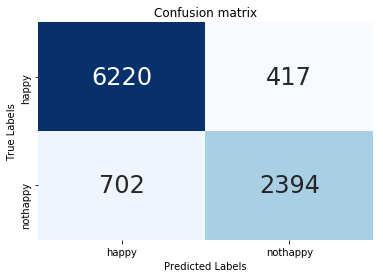

final score DecisionTreeClassifier() = > 0.7418062262406246
              precision    recall  f1-score   support

       happy       0.81      0.82      0.81      6637
   not happy       0.60      0.58      0.59      3096

    accuracy                           0.74      9733
   macro avg       0.70      0.70      0.70      9733
weighted avg       0.74      0.74      0.74      9733



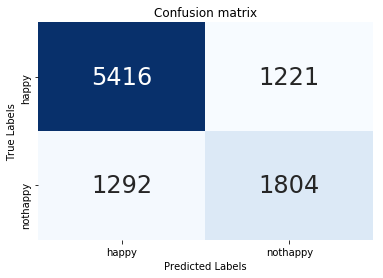

final score KNeighborsClassifier(n_neighbors=2) = > 0.7302989828418781
              precision    recall  f1-score   support

       happy       0.74      0.94      0.83      6637
   not happy       0.68      0.29      0.41      3096

    accuracy                           0.73      9733
   macro avg       0.71      0.61      0.62      9733
weighted avg       0.72      0.73      0.69      9733



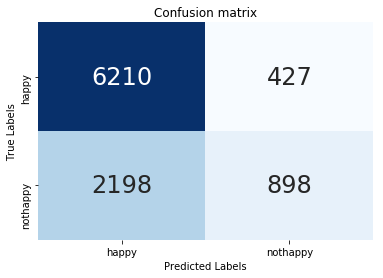

C:\Users\GT\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


final score LogisticRegression() = > 0.8840028768108497
              precision    recall  f1-score   support

       happy       0.90      0.94      0.92      6637
   not happy       0.85      0.77      0.81      3096

    accuracy                           0.88      9733
   macro avg       0.87      0.85      0.86      9733
weighted avg       0.88      0.88      0.88      9733



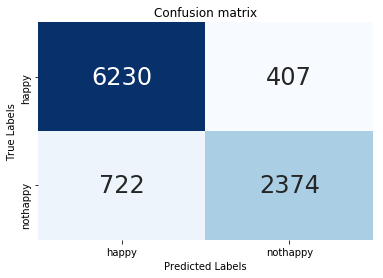

final score RandomForestClassifier(random_state=42) = > 0.8141374704613171
              precision    recall  f1-score   support

       happy       0.79      0.98      0.88      6637
   not happy       0.92      0.46      0.61      3096

    accuracy                           0.81      9733
   macro avg       0.86      0.72      0.74      9733
weighted avg       0.83      0.81      0.79      9733



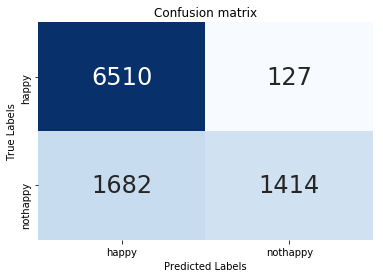

final score MultinomialNB() = > 0.7848556457412925
              precision    recall  f1-score   support

       happy       0.76      0.99      0.86      6637
   not happy       0.97      0.34      0.50      3096

    accuracy                           0.78      9733
   macro avg       0.86      0.67      0.68      9733
weighted avg       0.83      0.78      0.75      9733



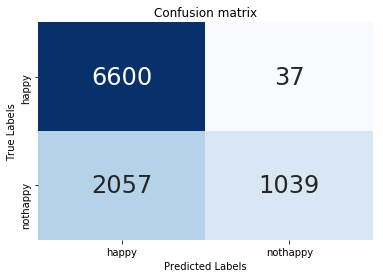

In [72]:
accuracy_score1=[]
naive = MultinomialNB()
rf = RandomForestClassifier(n_estimators = 100, random_state = 42)
svm = SVC(random_state = 1)
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier(n_neighbors = 2)
model = LogisticRegression()
z=[svm,dtc,knn,model,rf,naive]
for i in z:
    i.fit(X_train,Y_train)
    y_pred = i.predict(x_test)
    print('final score {} = >' .format(i),accuracy_score(y_test,y_pred))
    print(classification_report(y_test, y_pred))
    accuracy_score1.append(accuracy_score(y_test,y_pred))
    conf_mat = confusion_matrix(y_test,y_pred)

    ax=plt.subplot()

    sns.heatmap(conf_mat,ax=ax,annot=True,cmap="Blues",fmt="d",cbar=False, annot_kws={"size": 24})
    #sns.heatmap(conf_mat,annot=True,ax=ax,linewidths=5,linecolor='r',center=0)
    ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

    ax.set_title('Confusion matrix')
    ax.xaxis.set_ticklabels(['happy','nothappy'])
    ax.yaxis.set_ticklabels(['happy','nothappy'])
    plt.show()

# Model Selection


###### SVM

In [75]:
df2=df2.drop(['Browser_Used','Device_Used','User_ID'],axis=1)
df2.shape

(29404, 1)

In [76]:
tf_vec = TfidfVectorizer()

In [77]:
features = tf_vec.fit_transform(df['Description'])
features1 = tf_vec.transform(df2['Description'])

target = df['Is_Response']

In [ ]:
svm = SVC(random_state = 1)
svm.fit(features,target)

In [ ]:
y_pred= svm.predict(features1)

# Result save

In [ ]:
s=pd.DataFrame(y_pred,columns=['Is_Response'])
s.to_csv(r'dataframe.csv', index = False, header=True)